# Subjects structure

The aim of this notebook is to represent the subjects' distribution in the input space (ie, before encoding thanks to SimCLR or beta-VAE

In [1]:
import torch
import sys
import os
import math
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

sys.path.append('../')
from betaVAE.datasets import SkeletonDataset

## SC vs paracingular

### Loading of data

In [6]:
subject_dir = "/neurospin/dico/data/deep_folding/current/"
data_dir_1 = "/neurospin/dico/data/deep_folding/current/crops/CINGULATE/mask/sulcus_based/2mm/centered_combined/hcp/"
data_dir_2 = "/neurospin/dico/data/deep_folding/current/crops/CINGULATE/mask/sulcus_based/2mm/centered_combined/hcp/"
side = 'R'

In [7]:
train_list = pd.read_csv(os.path.join(subject_dir, 'train.csv'), header=None,
                            usecols=[0], names=['subjects'])
train_list['subjects'] = train_list['subjects'].astype('str')

tmp = pd.read_pickle(os.path.join(data_dir_1, f"{side}skeleton.pkl")).T
tmp.index.astype('str')

tmp2 = pd.read_pickle(os.path.join(data_dir_2, f"benchmark_skeleton_right.pkl")).T
tmp2.index.astype('str')

tmp = tmp.merge(train_list[:math.floor(len(train_list)/2)], left_on = tmp.index, right_on='subjects', how='right')
tmp2 = tmp2.merge(train_list[math.ceil(len(train_list)/2):], left_on = tmp2.index, right_on='subjects', how='right')
filenames = list(train_list['subjects'])

train_set = SkeletonDataset(dataframe=pd.concat([tmp, tmp2], ignore_index=True), filenames=filenames)

labels = np.array(['paracingular' for k in range(math.floor(len(train_list)/2))] \
         + ['SC' for k in range(math.ceil(len(train_list)/2)-1)])

FileNotFoundError: [Errno 2] No such file or directory: '/neurospin/dico/data/deep_folding/current/crops/CINGULATE/mask/sulcus_based/2mm/centered_combined/hcp/benchmark_skeleton_right.pkl'

### TSNE representation

In [12]:
X = np.array([train_set[k][0].flatten() for k in range(len(train_set))])

X_embedded = TSNE(n_components=2).fit_transform(X)

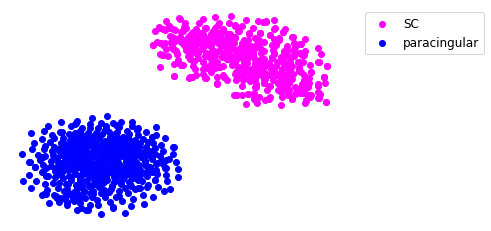

In [13]:
color_dict = {'paracingular': 'blue', 'SC': 'magenta'}
arr = X_embedded

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(labels):
    ix = np.where(labels == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    if g=='SC':
        g_lab = 'SC'
    else:
        g_lab=g
    ax.scatter(x, y, c = color_dict[g], label = g_lab)


plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

## Tissier vs HCP

### Loading of data

In [8]:
subject_dir = "/neurospin/dico/data/deep_folding/current/"
data_dir = "/neurospin/dico/data/deep_folding/current/crops/CINGULATE/mask/sulcus_based/2mm/centered_combined/"
side = 'R'

In [9]:
test_list = pd.read_csv(os.path.join(subject_dir, 'test.csv'), header=None,
                            usecols=[0], names=['subjects'])
test_list['subjects'] = test_list['subjects'].astype('str')

tmp = pd.read_pickle(os.path.join(data_dir, "hcp", f"{side}skeleton.pkl")).T
tmp.index.astype('str')

tmp2 = pd.read_pickle(os.path.join(data_dir, "tissier_2018", f"{side}skeleton.pkl")).T
tmp2.index.astype('str')

tmp = tmp.merge(test_list, left_on = tmp.index, right_on='subjects', how='right')

filenames = list(test_list['subjects']) + list(tmp2.index)

data_set = SkeletonDataset(dataframe=pd.concat([tmp, tmp2], ignore_index=True), filenames=filenames)

labels = np.array(['hcp' for k in range(len(test_list))] \
         + ['tissier' for k in range(len(tmp2))])

/usr/lib/python3/dist-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


### TSNE representation

In [24]:
X = np.array([data_set[k][0].flatten() for k in range(len(data_set))])

X_embedded = TSNE(n_components=2).fit_transform(X)

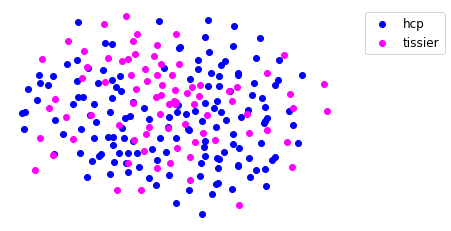

In [25]:
color_dict = {'hcp': 'blue', 'tissier': 'magenta'}
arr = X_embedded

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(labels):
    ix = np.where(labels == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    if g=='SC':
        g_lab = 'SC'
    else:
        g_lab=g
    ax.scatter(x, y, c = color_dict[g], label = g_lab)


plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()